In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('..')
from BBH_kick_sim import Simulator

In [2]:
params={
    'cluster_mass': 1e6, #Default=1e6
    'radius': 2, #Default=2
    'imf_alpha':2.25, #Default=2.35
    'min_bh_star':10, #Default=10
    'bh_mass_frac':0.5, #Default=0.5
    'use_mass_lookup':False, #Default=False
    'min_star':0.8, #Default=0.8
    'max_star':100, #Default=100
    'vel_thresh':0.1, #Default=0.1
    'rand_spin_type':'uniform', #Default='uniform'
}

sim = Simulator.Simulator(params,print_missing=True,rand_seed=1)
print(f'Escape velocity={sim.GC.v_esc}')

Setting up analytic mass distribution. This may take a while depending on your imf alpha
Done
Loaded NRSur7dq4Remnant fit.
Loaded NRSur3dq8Remnant fit.
Setup complete, Globular Cluster now has 14321 black holes.
Escape velocity=65.76879710558413


In [3]:
sim.begin_sim(sort_mass_first=False)

No stop time specified, Running until 1 or 0 black holes remain
14321/14321 remaining
12376/14321 remaining
10419/14321 remaining
8488/14321 remaining
6556/14321 remaining
4607/14321 remaining
2670/14321 remaining
737/14321 remaining
Finished. Total Simulation time: 1257645.7203608686
Total CPU time: 36.30890512466431


In [4]:
print(len(sim.GC.BHs),'in system, ejected:',len(sim.GC.ejected))
allBHs = sim.GC.BHs + sim.GC.ejected
print(len(allBHs))

0 in system, ejected: 6945
6945


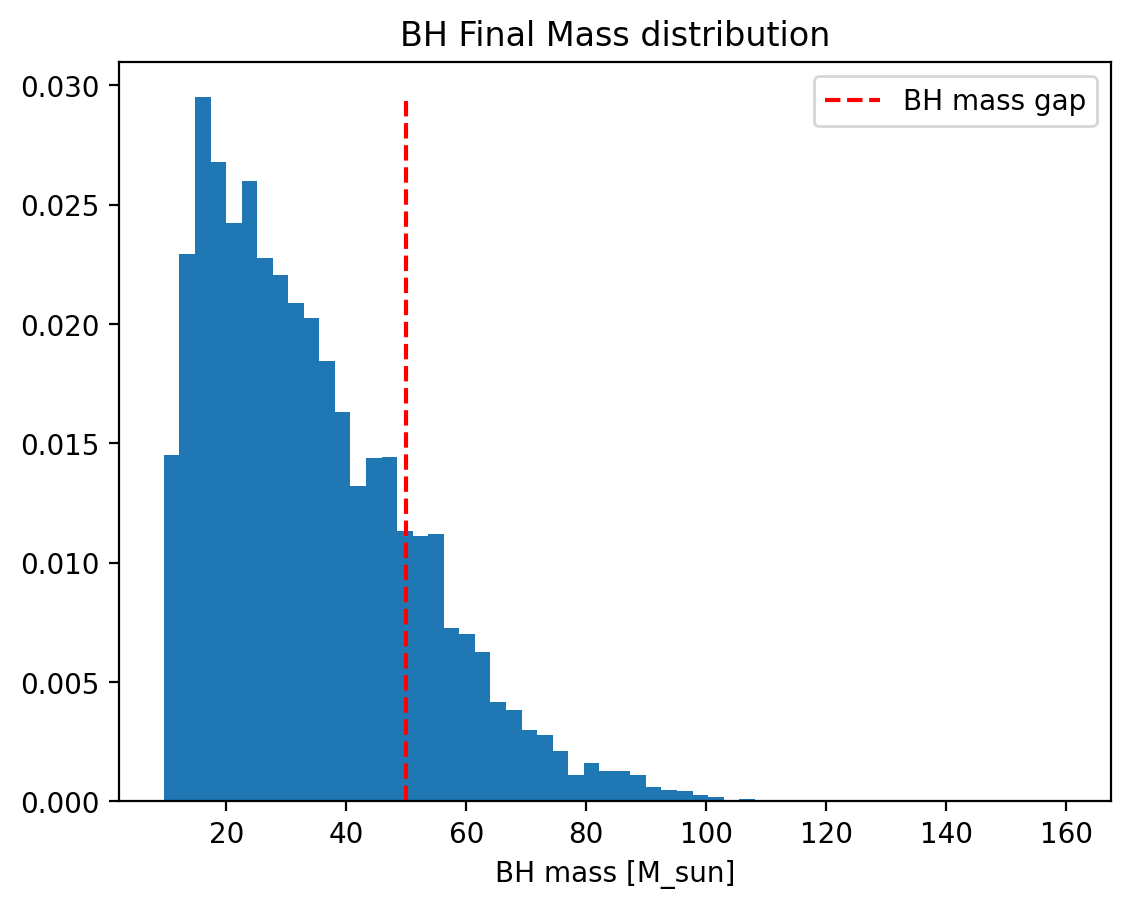

In [5]:
mall = [bh.m for bh in allBHs]
n,_,_=plt.hist(mall,bins='auto',density=True)
plt.title('BH Final Mass distribution')
plt.xlabel('BH mass [M_sun]')
maxBH = params['bh_mass_frac']*params['max_star']
plt.vlines(maxBH,0,max(n),linestyles='dashed',colors='r',label='BH mass gap')
plt.legend()
plt.show()

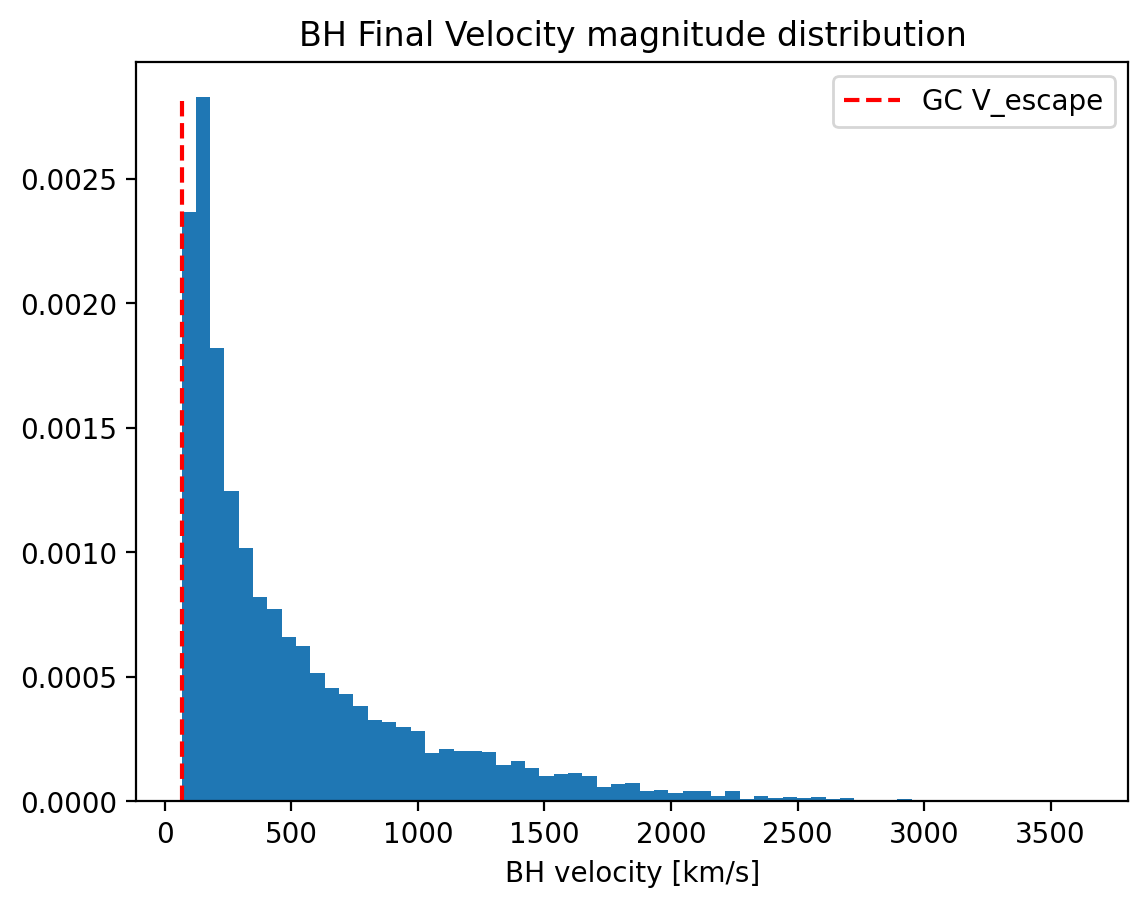

In [6]:
vall = np.array([np.sqrt(np.sum(np.square(bh.v))) for bh in allBHs])
n,_,_=plt.hist(vall,bins='auto',density=True)
plt.title('BH Final Velocity magnitude distribution')
plt.xlabel('BH velocity [km/s]')
plt.vlines(sim.GC.v_esc,0,max(n),linestyles='dashed',colors='r',label='GC V_escape')
plt.legend()
plt.show()

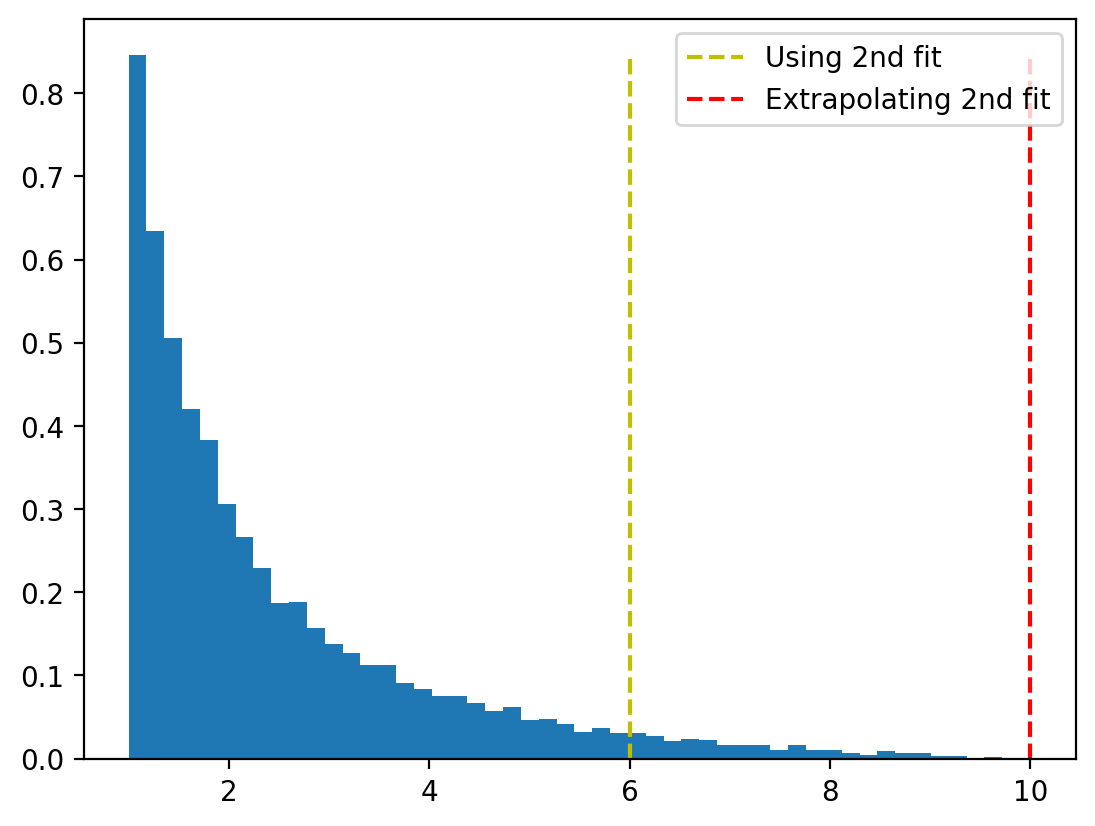

In [7]:
n,_,_=plt.hist(sim.collide_ratios,bins='auto',density=True)
plt.vlines(6,0,max(n),linestyles='dashed',colors='y',label='Using 2nd fit')
plt.vlines(10,0,max(n),linestyles='dashed',colors='r',label='Extrapolating 2nd fit')
plt.legend()
plt.show()

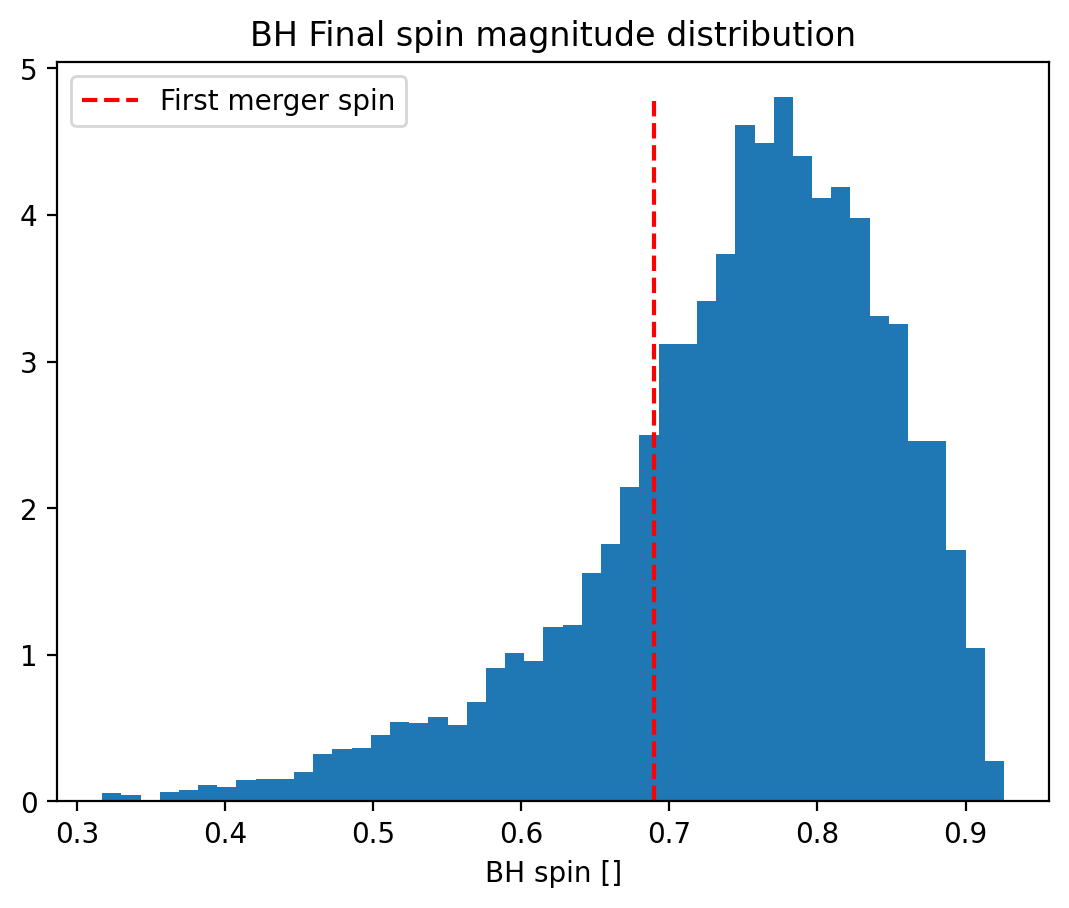

In [8]:
allS = np.array([np.sqrt(np.sum(np.square(bh.s))) for bh in allBHs])
n,_,_=plt.hist(allS,bins='auto',density=True)
plt.title('BH Final spin magnitude distribution')
plt.xlabel('BH spin []')
plt.vlines(0.69,0,max(n),linestyles='dashed',colors='r',label='First merger spin')
plt.legend()
plt.show()

In [9]:
allBHs.sort(key=lambda b: -b.m)
for bh in allBHs:
    bh.printTree(params=['m','v_imag','s'])

[m=159.939,s=[-0.099 -0.06   0.859],v_imag=2699.589]
├── [m=103.694,s=[-0.552 -0.258  0.653],v_imag=50.647]
│   ├── [m=58.677,s=[-0.267 -0.019  0.77 ],v_imag=52.205]
│   │   ├── [m=34.579,s=[-0.045 -0.083  0.53 ],v_imag=0.0]
│   │   └── [m=28.07,s=[-0.048  0.018  0.321],v_imag=0.0]
│   └── [m=54.255,s=[-0.129 -0.145  0.662],v_imag=52.11]
│       ├── [m=48.547,s=[ 0.283 -0.08   0.443],v_imag=0.0]
│       └── [m=6.706,s=[0.008 0.021 0.037],v_imag=0.0]
└── [m=68.791,s=[0.375 0.175 0.744],v_imag=40.314]
    ├── [m=52.691,s=[-0.049  0.011  0.662],v_imag=42.313]
    │   ├── [m=47.737,s=[ 0.353 -0.306  0.203],v_imag=0.0]
    │   └── [m=5.806,s=[-0.513 -0.039  0.37 ],v_imag=0.0]
    └── [m=20.193,s=[0.065 0.043 0.826],v_imag=42.317]
        ├── [m=15.523,s=[ 0.093 -0.073  0.661],v_imag=0.0]
        └── [m=5.721,s=[0.01  0.047 0.125],v_imag=0.0]

[m=128.201,s=[0.022 0.146 0.831],v_imag=1216.634]
├── [m=85.059,s=[-0.022  0.506  0.47 ],v_imag=38.541]
│   ├── [m=47.161,s=[ 0.    -0.     0.003],v_i

[m=60.528,s=[-0.053  0.078  0.664],v_imag=162.679]
├── [m=47.418,s=[-0.1    0.162  0.251],v_imag=0.0]
└── [m=15.292,s=[0.015 0.173 0.664],v_imag=0.0]

[m=60.524,s=[-0.037 -0.011  0.753],v_imag=99.632]
├── [m=40.354,s=[-0.056 -0.002  0.271],v_imag=0.0]
└── [m=23.481,s=[-0.206 -0.066  0.468],v_imag=0.0]

[m=60.474,s=[-0.061  0.053  0.572],v_imag=273.697]
├── [m=48.959,s=[-0.085  0.137  0.139],v_imag=0.0]
└── [m=13.195,s=[-0.173 -0.536  0.653],v_imag=0.0]

[m=60.459,s=[ 0.268 -0.09   0.734],v_imag=1370.654]
├── [m=41.413,s=[ 0.764 -0.211  0.284],v_imag=0.0]
└── [m=22.443,s=[ 0.191 -0.748  0.068],v_imag=0.0]

[m=60.408,s=[-0.06   0.006  0.72 ],v_imag=122.989]
├── [m=48.585,s=[-0.104  0.027  0.437],v_imag=0.0]
└── [m=13.98,s=[-0.117 -0.042  0.286],v_imag=0.0]

[m=60.407,s=[ 0.001 -0.     0.538],v_imag=139.93]
├── [m=49.353,s=[ 0.004 -0.001  0.116],v_imag=0.0]
└── [m=12.555,s=[-0.057  0.005  0.087],v_imag=0.0]

[m=60.404,s=[ 0.062 -0.014  0.863],v_imag=375.699]
├── [m=42.023,s=[ 0.201 -0.066

[m=47.654,s=[0.009 0.016 0.66 ],v_imag=117.878]
├── [m=38.401,s=[0.016 0.026 0.324],v_imag=0.0]
└── [m=10.759,s=[0.037 0.05  0.168],v_imag=0.0]

[m=47.602,s=[0.078 0.061 0.731],v_imag=934.695]
├── [m=29.236,s=[0.281 0.127 0.033],v_imag=0.0]
└── [m=20.997,s=[0.082 0.151 0.537],v_imag=0.0]

[m=47.59,s=[0.004 0.01  0.513],v_imag=165.746]
├── [m=38.318,s=[0.007 0.018 0.023],v_imag=0.0]
└── [m=10.494,s=[ 0.028 -0.021  0.336],v_imag=0.0]

[m=47.59,s=[0.009 0.052 0.825],v_imag=113.376]
├── [m=26.838,s=[0.004 0.047 0.257],v_imag=0.0]
└── [m=24.157,s=[0.041 0.285 0.777],v_imag=0.0]

[m=47.586,s=[0.13  0.142 0.692],v_imag=559.979]
├── [m=36.561,s=[0.259 0.324 0.279],v_imag=0.0]
└── [m=12.938,s=[ 0.462 -0.363  0.625],v_imag=0.0]

[m=47.557,s=[-0.015 -0.024  0.563],v_imag=121.639]
├── [m=39.796,s=[-0.038 -0.051  0.209],v_imag=0.0]
└── [m=8.861,s=[0.203 0.421 0.254],v_imag=0.0]

[m=47.556,s=[-0.249 -0.052  0.535],v_imag=325.888]
├── [m=40.716,s=[-0.388 -0.048  0.212],v_imag=0.0]
└── [m=7.795,s=[ 0.

[m=38.869,s=[0.016 0.021 0.789],v_imag=899.219]
├── [m=22.999,s=[ 0.148 -0.071  0.301],v_imag=0.0]
└── [m=18.34,s=[-0.141  0.254  0.474],v_imag=0.0]

[m=38.85,s=[-0.129  0.014  0.779],v_imag=1601.755]
├── [m=21.752,s=[-0.627  0.209  0.484],v_imag=0.0]
└── [m=19.602,s=[-0.007 -0.028  0.12 ],v_imag=0.0]

[m=38.847,s=[0.002 0.038 0.601],v_imag=326.566]
├── [m=29.633,s=[-0.02   0.023  0.072],v_imag=0.0]
└── [m=10.547,s=[0.198 0.624 0.518],v_imag=0.0]

[m=38.844,s=[0.019 0.026 0.843],v_imag=416.867]
├── [m=29.925,s=[-0.038  0.027  0.679],v_imag=0.0]
└── [m=11.044,s=[0.599 0.422 0.513],v_imag=0.0]

[m=38.844,s=[0.05  0.118 0.779],v_imag=1044.996]
├── [m=26.213,s=[0.247 0.439 0.452],v_imag=0.0]
└── [m=14.925,s=[-0.189 -0.245  0.241],v_imag=0.0]

[m=38.839,s=[0.    0.    0.648],v_imag=72.957]
├── [m=34.226,s=[0.285 0.078 0.321],v_imag=0.0]
└── [m=5.38,s=[-0.296 -0.648  0.441],v_imag=0.0]

[m=38.832,s=[-0.024 -0.036  0.79 ],v_imag=237.671]
├── [m=25.895,s=[-0.053 -0.089  0.38 ],v_imag=0.0]
└── 

[m=32.132,s=[-0.028  0.028  0.741],v_imag=597.061]
├── [m=19.756,s=[-0.045 -0.048  0.074],v_imag=0.0]
└── [m=14.193,s=[-0.142  0.378  0.548],v_imag=0.0]

[m=32.125,s=[0.012 0.004 0.511],v_imag=102.742]
├── [m=27.716,s=[0.018 0.005 0.185],v_imag=0.0]
└── [m=5.002,s=[-0.04   0.027  0.431],v_imag=0.0]

[m=32.121,s=[0.085 0.028 0.812],v_imag=1148.173]
├── [m=18.118,s=[0.418 0.106 0.565],v_imag=0.0]
└── [m=16.215,s=[ 0.009 -0.028  0.298],v_imag=0.0]

[m=32.119,s=[0.099 0.074 0.745],v_imag=872.528]
├── [m=24.178,s=[0.264 0.144 0.423],v_imag=0.0]
└── [m=9.415,s=[-0.161 -0.005  0.274],v_imag=0.0]

[m=32.119,s=[ 0.008 -0.041  0.664],v_imag=577.743]
├── [m=21.856,s=[-0.001 -0.003  0.008],v_imag=0.0]
└── [m=11.724,s=[ 0.102 -0.502  0.421],v_imag=0.0]

[m=32.114,s=[0.018 0.035 0.855],v_imag=329.072]
├── [m=23.828,s=[0.049 0.084 0.732],v_imag=0.0]
└── [m=10.249,s=[-0.006  0.02   0.152],v_imag=0.0]

[m=32.088,s=[ 0.054 -0.14   0.846],v_imag=337.735]
├── [m=21.836,s=[ 0.147 -0.501  0.695],v_imag=0.0]

[m=26.075,s=[-0.023  0.021  0.623],v_imag=351.073]
├── [m=19.948,s=[-0.018 -0.02   0.148],v_imag=0.0]
└── [m=7.037,s=[-0.367  0.711  0.219],v_imag=0.0]

[m=26.074,s=[0.065 0.053 0.526],v_imag=225.306]
├── [m=21.198,s=[0.125 0.083 0.064],v_imag=0.0]
└── [m=5.543,s=[-0.074 -0.01   0.512],v_imag=0.0]

[m=26.072,s=[0.181 0.037 0.746],v_imag=283.995]
├── [m=21.301,s=[0.326 0.036 0.496],v_imag=0.0]
└── [m=5.743,s=[ 0.21  -0.026  0.576],v_imag=0.0]

[m=26.066,s=[0.003 0.019 0.738],v_imag=197.238]
├── [m=15.645,s=[-0.04   0.07   0.116],v_imag=0.0]
└── [m=11.877,s=[0.106 0.025 0.364],v_imag=0.0]

[m=26.066,s=[0.014 0.002 0.68 ],v_imag=183.691]
├── [m=18.233,s=[0.004 0.    0.046],v_imag=0.0]
└── [m=9.034,s=[ 0.15  -0.002  0.788],v_imag=0.0]

[m=26.064,s=[0.016 0.032 0.702],v_imag=509.033]
├── [m=17.779,s=[0.04  0.002 0.13 ],v_imag=0.0]
└── [m=9.547,s=[0.02  0.371 0.46 ],v_imag=0.0]

[m=26.063,s=[-0.045 -0.041  0.906],v_imag=504.806]
├── [m=18.473,s=[-0.117 -0.114  0.841],v_imag=0.0]
└── [m=9.763

[m=20.73,s=[-0.036 -0.009  0.838],v_imag=1293.204]
├── [m=11.737,s=[-0.262 -0.082  0.563],v_imag=0.0]
└── [m=10.538,s=[0.104 0.079 0.511],v_imag=0.0]

[m=20.72,s=[-0.011 -0.048  0.884],v_imag=429.943]
├── [m=15.452,s=[-0.021 -0.124  0.8  ],v_imag=0.0]
└── [m=6.673,s=[-0.03  -0.017  0.324],v_imag=0.0]

[m=20.718,s=[0.029 0.021 0.755],v_imag=293.148]
├── [m=13.551,s=[0.099 0.042 0.332],v_imag=0.0]
└── [m=8.304,s=[0.005 0.046 0.197],v_imag=0.0]

[m=20.704,s=[-0.012 -0.001  0.602],v_imag=149.276]
├── [m=15.981,s=[-0.022  0.003  0.134],v_imag=0.0]
└── [m=5.395,s=[-0.021 -0.016  0.009],v_imag=0.0]

[m=20.704,s=[ 0.004 -0.     0.643],v_imag=136.185]
├── [m=14.074,s=[0.005 0.003 0.02 ],v_imag=0.0]
└── [m=7.513,s=[ 0.027 -0.021  0.039],v_imag=0.0]

[m=20.7,s=[ 0.008 -0.011  0.702],v_imag=128.654]
├── [m=11.537,s=[ 0.01  -0.001  0.046],v_imag=0.0]
└── [m=10.245,s=[ 0.027 -0.075  0.071],v_imag=0.0]

[m=20.682,s=[-0.116 -0.208  0.711],v_imag=1488.82]
├── [m=15.438,s=[-0.358 -0.482  0.281],v_imag=0

[m=15.877,s=[0.033 0.096 0.73 ],v_imag=284.553]
├── [m=11.193,s=[0.102 0.279 0.294],v_imag=0.0]
└── [m=5.461,s=[ 0.069 -0.099  0.298],v_imag=0.0]

[m=15.872,s=[ 0.073 -0.061  0.822],v_imag=735.414]
├── [m=9.012,s=[ 0.329 -0.083  0.386],v_imag=0.0]
└── [m=7.998,s=[ 0.047 -0.373  0.594],v_imag=0.0]

[m=15.864,s=[0.093 0.021 0.764],v_imag=776.333]
├── [m=11.408,s=[0.26  0.014 0.438],v_imag=0.0]
└── [m=5.267,s=[-0.056  0.018  0.199],v_imag=0.0]

[m=15.848,s=[-0.025  0.023  0.827],v_imag=629.279]
├── [m=8.993,s=[-0.141  0.045  0.621],v_imag=0.0]
└── [m=7.985,s=[0.026 0.124 0.318],v_imag=0.0]

[m=15.838,s=[-0.039  0.207  0.781],v_imag=1552.247]
├── [m=10.748,s=[-0.002  0.623  0.333],v_imag=0.0]
└── [m=6.075,s=[-0.332  0.28   0.614],v_imag=0.0]

[m=15.837,s=[-0.043 -0.025  0.853],v_imag=350.263]
├── [m=9.86,s=[-0.139 -0.072  0.832],v_imag=0.0]
└── [m=7.147,s=[-0.052 -0.022  0.08 ],v_imag=0.0]

[m=15.835,s=[-0.015  0.015  0.701],v_imag=202.224]
├── [m=9.544,s=[-0.005  0.015  0.016],v_imag=0.0]